In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [214]:
df = pd.read_csv(r'Analytics Case Study Dataset - Bazaar Launchpad 2023.csv')

#### HOW DATA LOOKS LIKE

In [215]:
df.head()

,dispatch_date,order_date,city,town,uc,delivery_warehouse,delivered_by,store_id,shaheen_id,tour_number,...,item_discount,net_gmv,gross_nmv,adjustment_amount,ordered_quantity,delivered_quantity,returned_quantity,out_of_stock_quantity,adjustment_reason,simplified_return_reason
0,8/1/2022,7/30/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,10,2860,0,0,2,0,2,0,NaN,Customer Issue
1,8/1/2022,7/31/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,0,1764,1764,0,3,3,0,0,NaN,NaN
2,8/1/2022,7/31/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,0,1368,1368,0,3,3,0,0,NaN,NaN
3,8/1/2022,7/30/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,0,2352,0,0,4,0,4,0,NaN,Customer Issue
4,8/1/2022,7/29/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,3,1136,1160,0,8,8,0,0,NaN,NaN


#### SOME INFO ABOUT THE CURRENT DATA

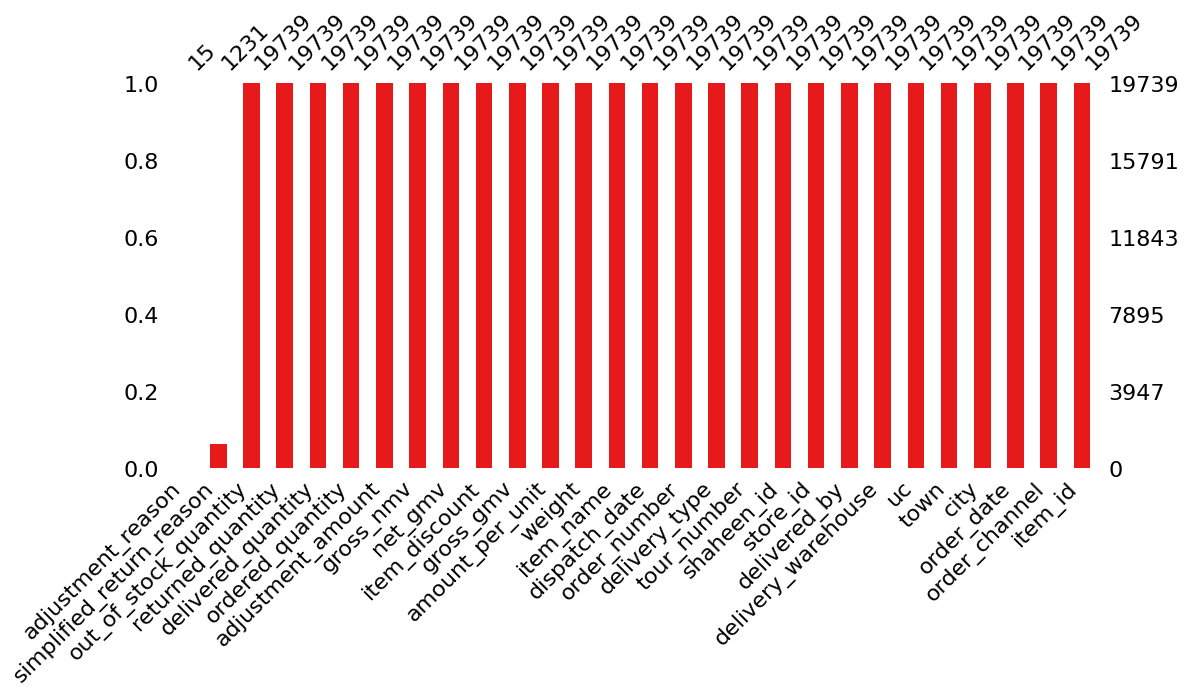

In [216]:
import missingno as msno

msno.bar(df, figsize=(12, 5), sort='ascending', color=(0.9, 0.1, 0.1))
plt.show()

In [217]:
df.describe()

,item_id,weight,amount_per_unit,gross_gmv,item_discount,net_gmv,gross_nmv,adjustment_amount,ordered_quantity,delivered_quantity,returned_quantity,out_of_stock_quantity
count,1.973900e+04,19739.000000,19739.000000,1.973900e+04,19739.000000,19739.000000,1.973900e+04,19739.000000,19739.000000,19739.000000,19739.000000,19739.000000
mean,4.109656e+17,2.619082,741.017427,1.601842e+03,0.815340,1594.106692,1.507530e+03,0.666346,3.250671,3.077664,0.171032,0.001976
std,3.179919e+17,4.290583,1274.711105,8.414398e+03,5.301192,7993.724741,8.158867e+03,28.740021,7.231791,7.067169,1.664398,0.105316
min,5.271640e+12,0.003000,19.000000,1.900000e+01,0.000000,19.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000
25%,9.316550e+16,0.220000,109.000000,2.120000e+02,0.000000,212.000000,1.690000e+02,0.000000,1.000000,1.000000,0.000000,0.000000
50%,3.798590e+17,0.375000,183.000000,5.700000e+02,0.000000,565.000000,5.070000e+02,0.000000,2.000000,2.000000,0.000000,0.000000
75%,6.845830e+17,4.800000,860.000000,1.710000e+03,0.000000,1710.000000,1.620000e+03,0.000000,3.000000,3.000000,0.000000,0.000000
max,9.999050e+17,50.000000,8920.000000,1.007500e+06,450.000000,937750.000000,1.007500e+06,2700.000000,455.000000,450.000000,100.000000,12.000000


In [218]:
df.drop(columns=['order_number', 'item_id'], inplace=True)

In [219]:
df.columns

Index(['dispatch_date', 'order_date', 'city', 'town', 'uc',
       'delivery_warehouse', 'delivered_by', 'store_id', 'shaheen_id',
       'tour_number', 'delivery_type', 'order_channel', 'item_name', 'weight',
       'amount_per_unit', 'gross_gmv', 'item_discount', 'net_gmv', 'gross_nmv',
       'adjustment_amount', 'ordered_quantity', 'delivered_quantity',
       'returned_quantity', 'out_of_stock_quantity', 'adjustment_reason',
       'simplified_return_reason'],
      dtype='object')

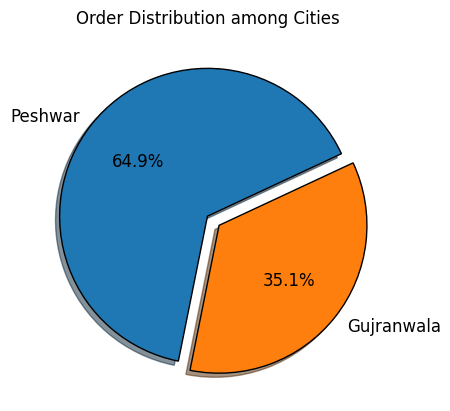

In [220]:
plt.pie(df['city'].value_counts(), labels=['Peshwar', 'Gujranwala'], autopct='%1.1f%%', explode=(0, 0.1), shadow=True, startangle=25, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Order Distribution among Cities')
plt.show()

In [221]:
df['Ret/Not Ret'] = df['returned_quantity'].apply(lambda x: 'Returned' if x >= 1 else 'Not Returned')

In [222]:
all_data = df['Ret/Not Ret'].value_counts()
data_P = df.loc[df['city'] == 'Peshawar', 'Ret/Not Ret'].value_counts()
data_G = df.loc[df['city'] == 'Gujranwala', 'Ret/Not Ret'].value_counts()

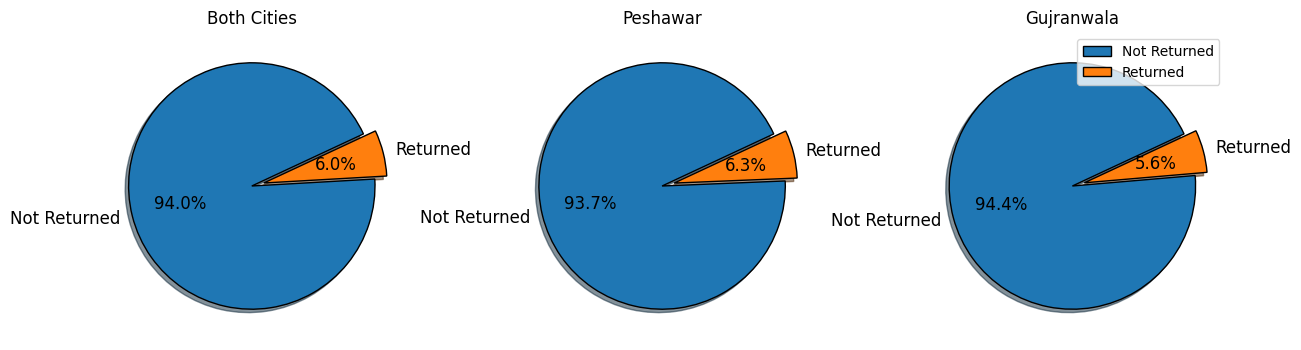

In [223]:
plt.figure(figsize=(15, 4))
i=0
ds = [all_data, data_P, data_G]
titles = ['Both Cities', 'Peshawar', 'Gujranwala']
for data, i , title in zip(ds, range(len(ds)), titles):
    plt.subplot(1, 3,i+1)
    plt.pie(data, labels=data.index.tolist(), autopct='%1.1f%%', explode=(0, 0.1), shadow=True, startangle=25, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
    plt.title(title)
plt.legend(loc='upper right')
plt.show()

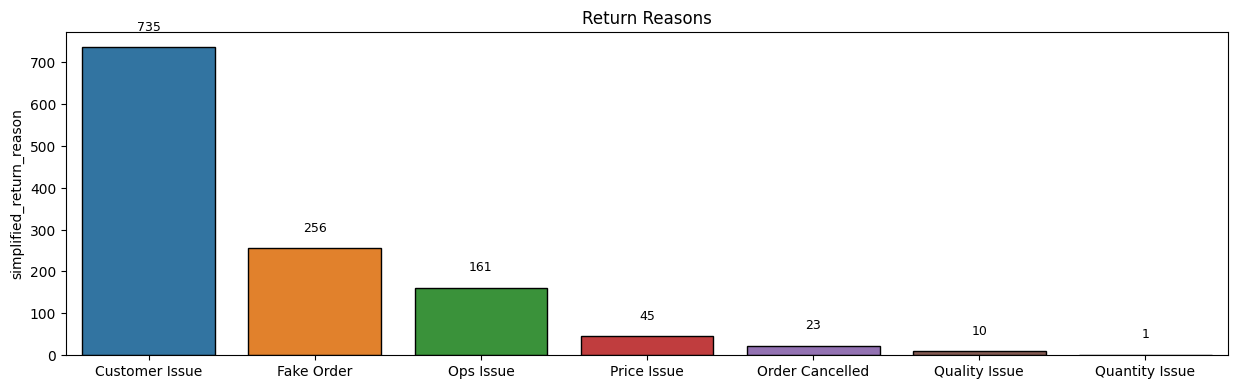

In [224]:
plt.figure(figsize=(15, 4.2))
ax = sns.barplot(data = df, y = df['simplified_return_reason'].value_counts(), x = df['simplified_return_reason'].value_counts().index.tolist(), linewidth=1, edgecolor='black')
for val, container in zip(df['simplified_return_reason'], ax.containers):
    ax.bar_label(container, fontsize=9, padding=10)
plt.title('Return Reasons')
plt.show()

In [225]:
df.select_dtypes(include=['int64']).columns

Index(['amount_per_unit', 'gross_gmv', 'item_discount', 'net_gmv', 'gross_nmv',
       'adjustment_amount', 'ordered_quantity', 'delivered_quantity',
       'returned_quantity', 'out_of_stock_quantity'],
      dtype='object')

### Explain losses occuring due to returns

In [226]:
data_P = df[df['city'] == 'Peshawar']
data_G = df[df['city'] == 'Gujranwala']

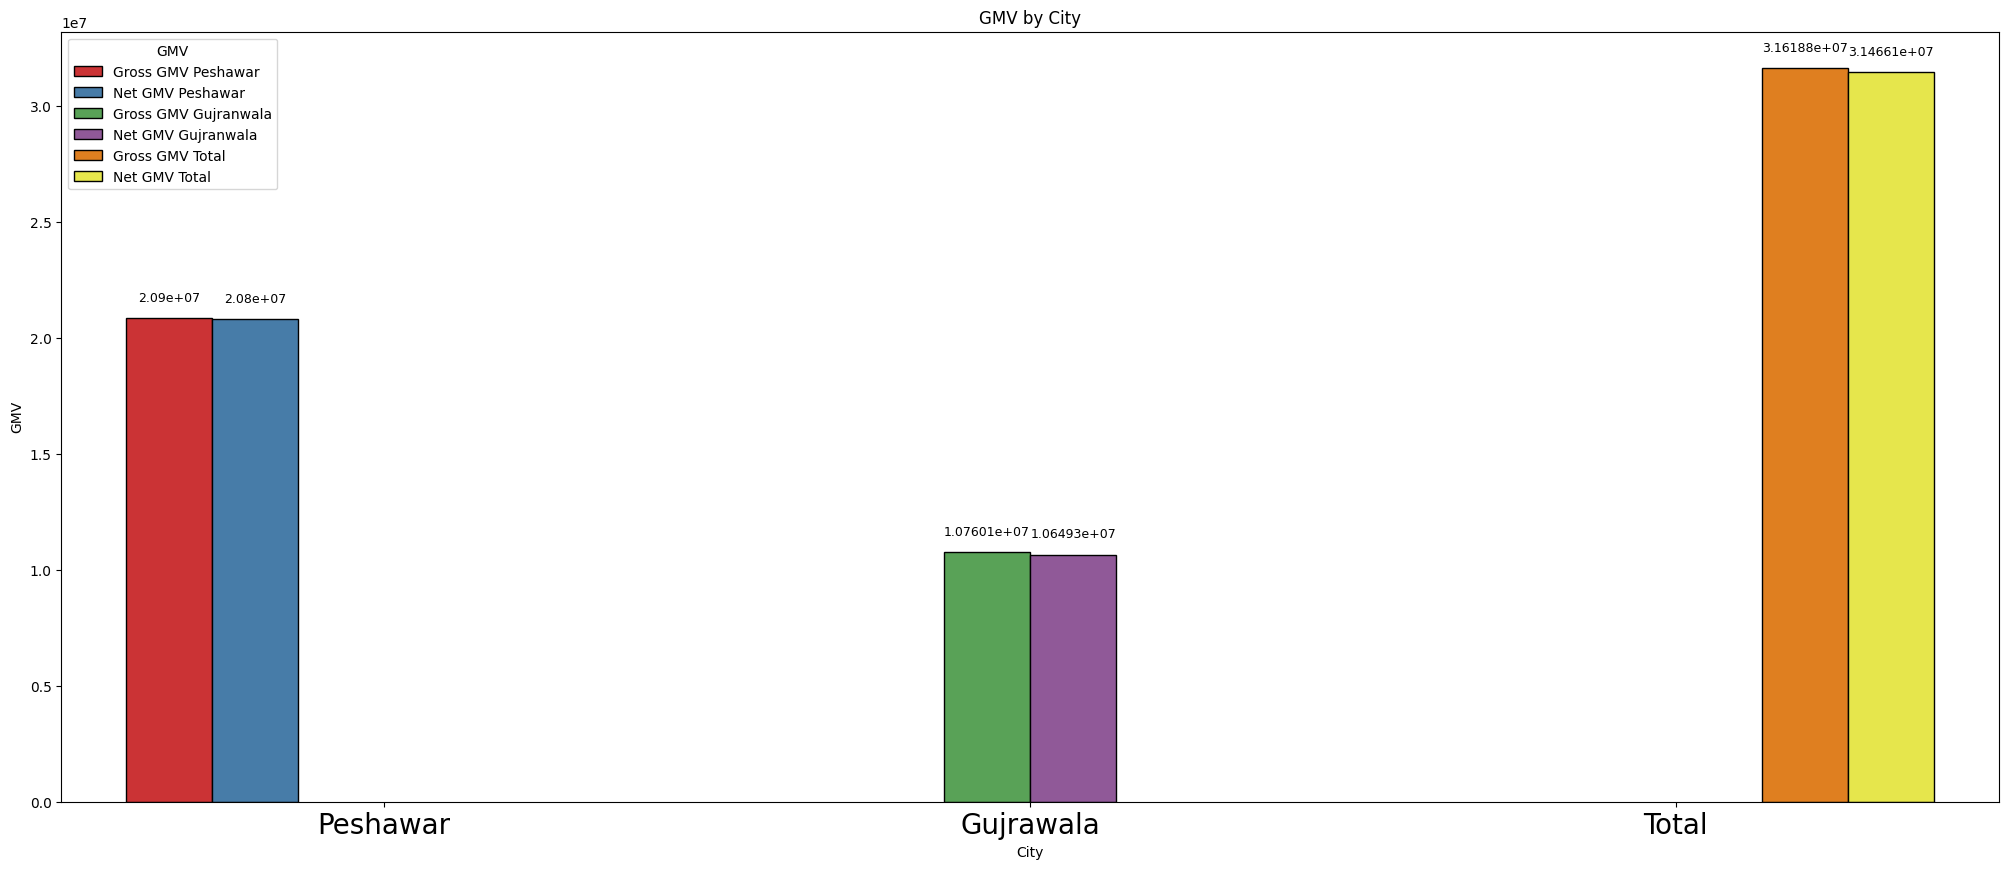

In [227]:
plt.figure(figsize=(25, 10))
temp_df = pd.DataFrame({
    'GMV': ['Gross GMV Peshawar', 'Net GMV Peshawar', 'Gross GMV Gujranwala', 'Net GMV Gujranwala', 'Gross GMV Total', 'Net GMV Total'],
    'Value': [
        data_P['gross_gmv'].sum(),
        data_P['net_gmv'].sum(),
        data_G['gross_gmv'].sum(),
        data_G['net_gmv'].sum(),
        data_P['gross_gmv'].sum() + data_G['gross_gmv'].sum(),
        data_P['net_gmv'].sum() + data_G['net_gmv'].sum()
    ],
    'Category': ['Peshawar', 'Peshawar', 'Gujrawala', 'Gujrawala', 'Total', 'Total']
})

label_format = "%.2e"
ax = sns.barplot(x='Category', y='Value', hue='GMV', data=temp_df, linewidth=1, edgecolor='black', palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=0, ha='center')

for val, container in zip(temp_df['Value'], ax.containers):
    ax.bar_label(container, labels=[label_format % val], fontsize=9, padding=10)
plt.xlabel('City')
plt.ylabel('GMV')
plt.title('GMV by City')
plt.show()


In [228]:
temp_df

,GMV,Value,Category
0,Gross GMV Peshawar,20858650,Peshawar
1,Net GMV Peshawar,20816759,Peshawar
2,Gross GMV Gujranwala,10760106,Gujrawala
3,Net GMV Gujranwala,10649313,Gujrawala
4,Gross GMV Total,31618756,Total
5,Net GMV Total,31466072,Total


#### Why returns?

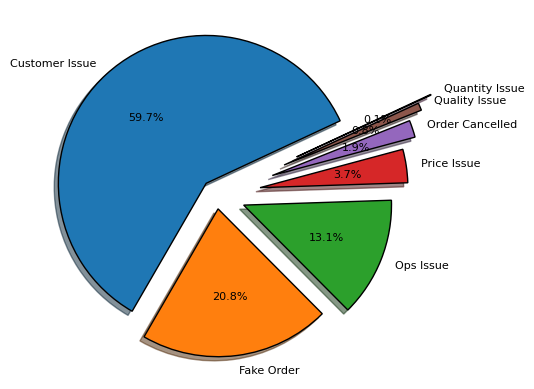

In [229]:
plt.pie(df['simplified_return_reason'].value_counts(), labels=df['simplified_return_reason'].value_counts().index.tolist(), autopct='%1.1f%%', explode=(0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6), shadow=True, startangle=25, textprops={'fontsize': 8}, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.show()

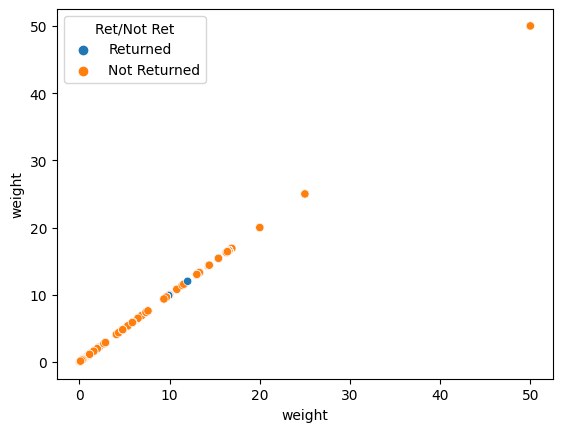

In [230]:
sns.scatterplot(data=df, x='weight', y='weight', hue='Ret/Not Ret')
plt.show()

In [231]:
# Most returned items
df[df['Ret/Not Ret'] == 'Returned']['item_name'].value_counts().head(10).reset_index().rename(columns={'index': 'Item Name', 'item_name': 'Count'})

,Item Name,Count
0,Capstan by Pall Mall (10 packs),44
1,Dettol Soap 85 gm Original,30
2,Sting Red Berry 500 ml Pack x 12,29
3,Dettol Soap 85 gm Cool,27
4,Gold Leaf Full Filter (10 Packs),21
5,Slice Mango Juice 200 ml Carton (24 pcs),19
6,Nestle Fruita Vitals Chaunsa 200 ml Carton (24...,18
7,Tapal Tezdum 8 gm Sachet x 10,16
8,Prince Chocolate Sandwich Biscuits Rs. 10 Box ...,16
9,All Max Tea Whitener 223 ml Carton (27 pcs),16


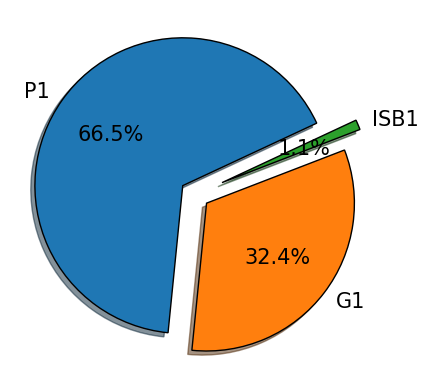

In [232]:
# Most Returned Items per Warehouse
plt.pie(df[df['Ret/Not Ret'] == 'Returned']['delivery_warehouse'].value_counts(), labels=df[df['Ret/Not Ret'] == 'Returned']['delivery_warehouse'].value_counts().index.tolist(), autopct='%1.1f%%', explode=(0.1, 0.1, 0.2), shadow=True, startangle=25, textprops={'fontsize': 15}, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.show()

In [233]:
len(df[(df['city'] == 'Peshawar') & (df['Ret/Not Ret'] == 'Returned') & (df['simplified_return_reason'] == 'Customer Issue')])

450

In [234]:
temp_P = df[(df['Ret/Not Ret'] == 'Returned') & (df['city'] == 'Peshawar') & (df['simplified_return_reason'] == 'Customer Issue')]['uc'].value_counts().head().sort_values(ascending=False).reset_index().rename(columns={'index': 'uc', 'uc': 'Count'})
# print('Count of returns from specific UCs in Peshawar')

In [235]:
temp_P.head()

,uc,Count
0,"PSH - 10 (Old Bara Rd, Abdara Rd)",76
1,"PSH - 29(Barafkhana, Phandu)",44
2,"PSH - 07 (Canal Road, Board Bazar)",35
3,"PSH - 06 (Tajabad, Academy Town, Sufaid Dheri)",30
4,"PSH - 22 (Murshidabad, Hassanpir Rd)",23


In [236]:
df[(df['Ret/Not Ret'] == 'Returned') & (df['city'] == 'Peshawar') & (df['simplified_return_reason'] == 'Customer Issue') & (df['uc'] == 'PSH - 10 (Old Bara Rd, Abdara Rd)')]['item_name'].value_counts().head().sort_values(ascending=False).reset_index().rename(columns={'index': 'item_name', 'item_name': 'Count'})
# print('Count of returns from specific UCs in Peshawar')

,item_name,Count
0,Slice Mango Juice 200 ml Carton (24 pcs),5
1,Sting Red Berry 500 ml Pack x 12,3
2,Nestle Fruita Vitals Chaunsa 200 ml Carton (24...,3
3,Mountain Dew 1.5L Pack x 6,3
4,Sprite 1.5L Pack x 6,2


##### Finding update: 
##### 1) Most of the items returned by PSH - 10 (Old Bara Rd, Abdara Rd), and most of them are liquid items.
##### 2) OverAll capston is being returned